In [39]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from explainerdashboard import ClassifierExplainer
# To run in python
from explainerdashboard import InlineExplainer
# Uses Port Forwarding as default.
from explainerdashboard import ExplainerDashboard


In [28]:
data = pd.read_csv('MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


In [29]:
# Sample for faster run time.
data = data.sample(n=10000, random_state=123)

In [30]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('.', '')
data.columns = data.columns.str.replace('_', '')

In [35]:
# Remove inf if exists (random sampling).
data = data[~np.isinf(data).any(axis=1)]

!!ERROR ENCOUNTERED: It seems the Standard Scaler turns some of the feature values to infiniti. From there they need to be filtered and then the data put back to the scaler. So far it seems to be just a single row
each time but it occurs every time regardless of the random sample. (CIC2017 dataset)

C:\Users\adi_s\AppData\Local\Temp\ipykernel_25456\1777189477.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 0.9985


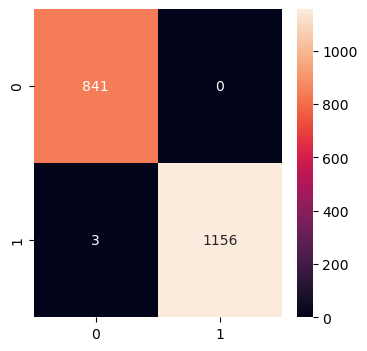

In [36]:
# Encode Label
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
X = data.drop(columns=['Label'])
y = data['Label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# 98%!
print(f'Accuracy: {accuracy}')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

(7999, 78, 2)


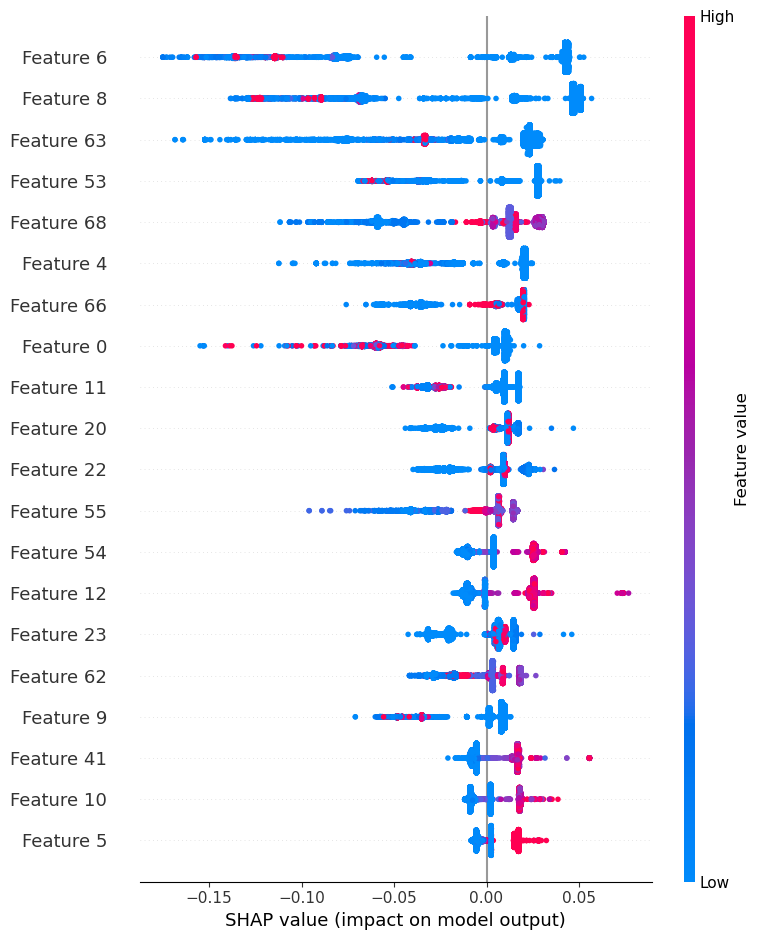

In [37]:
# Run the explainer on just the 1 labels (DDOS attacks).
# The plot seems limited in the amount of features it can show.
explainer = shap.TreeExplainer(rf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)
shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_train)

In [42]:
X_test_df = pd.DataFrame(X_test, columns=data.drop(columns=['Label']).columns)

feature_descriptions = {
    'A': '1',
    'B': '2',
    'C': '3'
}
explainer = ClassifierExplainer(rf, X_test_df, y_test)

# Run the dashboard
#ExplainerDashboard(explainer).run()
InlineExplainer(explainer).shap.dependence()
InlineExplainer(explainer).shap.dependence(hide_cats=True, hide_index=True, col="Fare")
InlineExplainer(explainer).shap.overview()
InlineExplainer(explainer).tab.importances()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Calculating shap values...


c:\Users\adi_s\anaconda3\envs\conda311new\Lib\site-packages\dash\dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



ValueError: 'Fare' is not in list